<a href="https://colab.research.google.com/github/lk-learner/Riipen-Solv4x/blob/main/ElectricCarprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import  LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load in the data
dataset = pd.read_csv('/content/ElectricCarData_Clean_Me.csv')

####Exploratory Data Analysis

In [3]:
#Check the head of the data
dataset.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Battery_Pack Kwh,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,460,70.0,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,45.0,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,75.0,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,74.0,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,28.5,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             102 non-null    object 
 1   Model             102 non-null    object 
 2   AccelSec          102 non-null    float64
 3   TopSpeed_KmH      102 non-null    int64  
 4   Range_Km          102 non-null    int64  
 5   Battery_Pack Kwh  102 non-null    float64
 6   Efficiency_WhKm   102 non-null    int64  
 7   FastCharge_KmH    102 non-null    int64  
 8   RapidCharge       102 non-null    object 
 9   PowerTrain        102 non-null    object 
 10  PlugType          102 non-null    object 
 11  BodyStyle         102 non-null    object 
 12  Segment           102 non-null    object 
 13  Seats             102 non-null    int64  
 14  PriceEuro         102 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 12.1+ KB


In [5]:
dataset.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Battery_Pack Kwh,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,7.391176,179.313725,338.627451,65.415686,189.303922,435.686275,4.882353,55997.588235
std,3.031913,43.771228,126.700623,29.955782,29.679072,220.447384,0.799680,34250.724403
min,2.100000,123.000000,95.000000,16.700000,104.000000,0.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,43.125000,168.000000,260.000000,5.000000,34414.750000
50%,7.300000,160.000000,340.000000,64.350000,180.500000,440.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,83.700000,204.500000,557.500000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,200.000000,273.000000,940.000000,7.000000,215000.000000


In [6]:
dataset.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Battery_Pack Kwh', 'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge',
       'PowerTrain', 'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

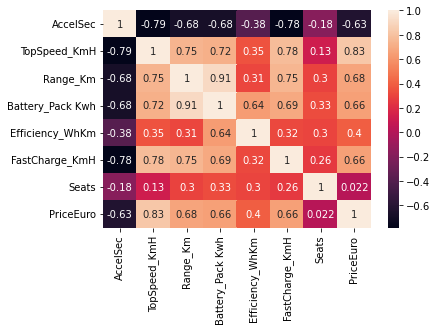

In [7]:
sns.heatmap(dataset.corr(),annot=True);

In [8]:
dataset_trans=pd.get_dummies(dataset)
X = dataset_trans.drop(['PriceEuro'],axis=1)
y=dataset_trans['PriceEuro']
features = X.columns

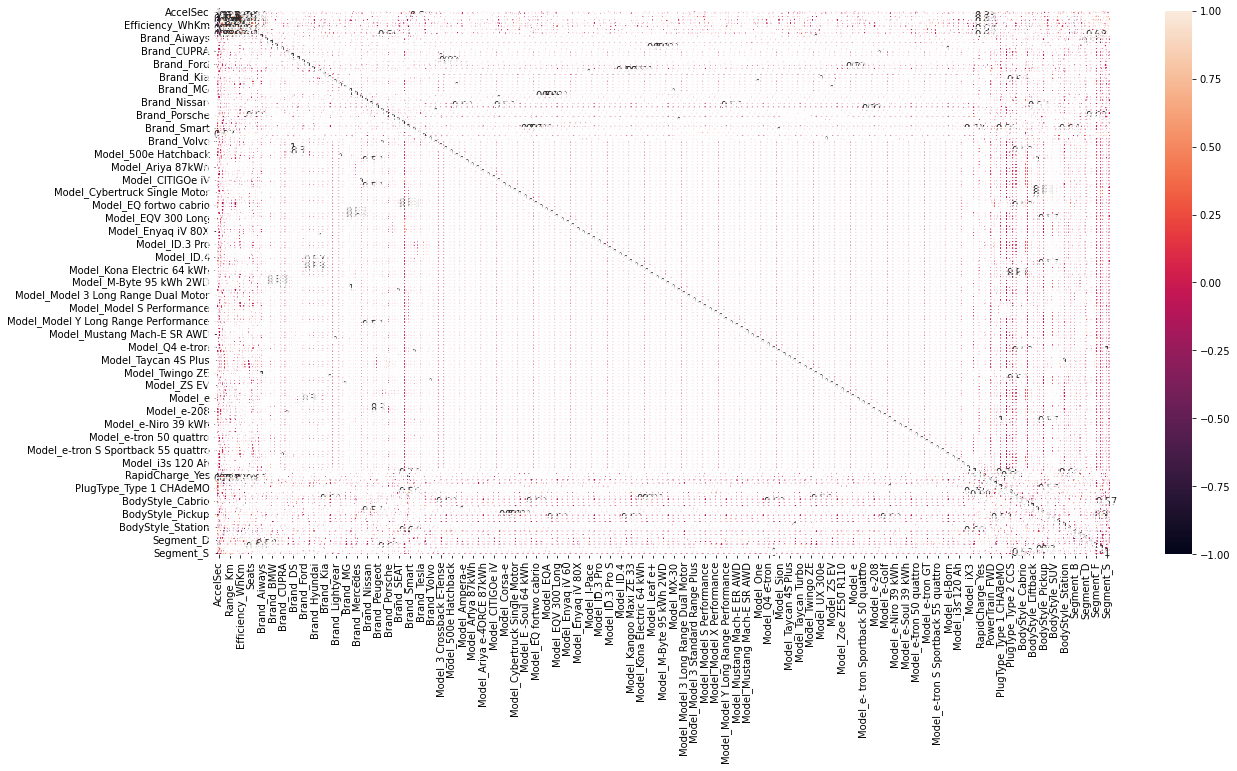

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(dataset_trans.corr(),annot=True);

In [10]:
#scale the data
s = StandardScaler()
X = s.fit_transform(X)

In [11]:

X_train,X_test,y_train,y_test = train_test_split(X,y)

###Prediction and Evaluate the Model Performance


In [12]:
models_eval = pd.DataFrame(index=['Null','KNN','MLR'],columns=['RMSE'])

In [13]:
ypred_null = y_train.mean()

####K-Neighbours Regressor

In [14]:
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train,y_train)



KNeighborsRegressor(n_neighbors=7)

In [15]:
KNeighborsRegressor(n_neighbors=7)

KNeighborsRegressor(n_neighbors=7)

In [16]:
y_pred = knn.predict(X_test)

####Random Forrest Regression

In [17]:
rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train,y_train)
y_pred2=y_pred = rf.predict(X_test)

####Linear Regression

In [18]:
lin = LinearRegression()
lin = lin.fit(X_train,y_train)
y_pred3 = lin.predict(X_test)

####Lasso Regression

In [19]:
lasso = Lasso()
lasso.fit(X_train,y_train)
y_pred4 = lasso.predict(X_test)

In [20]:
model_eval=pd.DataFrame(index=['KNN','MLR'],columns=['RMSE'])
model_eval.loc['KNN','RMSE']=np.sqrt(mean_squared_error(y_test,y_pred))
model_eval.loc['RF','RMSE'] = np.sqrt(mean_squared_error(y_test,y_pred2))
model_eval.loc['MLR','RMSE'] = np.sqrt(mean_squared_error(y_test,y_pred3))
model_eval.loc['Lasso','RMSE'] = np.sqrt(mean_squared_error(y_test,y_pred4))
model_eval.loc['NULL','RMSE'] = ypred_null
model_eval

,RMSE
KNN,23940.555544
MLR,23681.80129
RF,23940.555544
Lasso,31281.749825
NULL,55257.065789


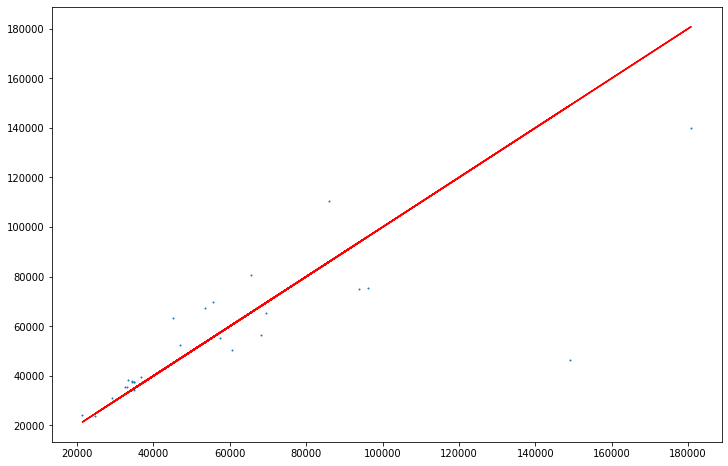

In [21]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(y_test,y_pred,s=1)
ax.plot(y_test,y_test,color='red')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


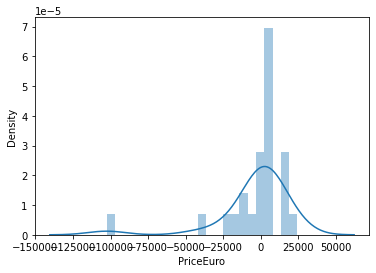

In [22]:
sns.distplot(y_pred-y_test)

In [23]:
lin=LinearRegression()
lin.fit(X_train,y_train)
y_pred2 = lin.predict(X_test)
model_eval.loc['MLR','RMSE']=np.sqrt(mean_squared_error(y_pred2,y_test))

In [24]:
#features importance
from sklearn.ensemble import ExtraTreesRegressor
model =ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [25]:
model.feature_importances_.tolist()

[0.03841720782341071,
 0.1085692828362345,
 0.014001403276129021,
 0.021162299532238263,
 0.016494515004406237,
 0.001897616131563032,
 0.007054237925903526,
 4.5697328349242604e-05,
 0.0011966547730202092,
 0.004201851244005228,
 0.0002476281900263015,
 3.674928344073379e-06,
 8.375510018197028e-05,
 1.6780591492347803e-05,
 2.2548038203045502e-05,
 5.7043085540860944e-05,
 4.5661802636093e-07,
 1.3845948483907299e-05,
 4.7291646066833406e-05,
 2.7448214075480255e-05,
 0.0007378640533112605,
 0.0013685370352496038,
 8.833320406383628e-07,
 0.00010442462984754933,
 4.081000713456424e-06,
 0.002560439088287495,
 3.249234052827704e-05,
 8.912652686294544e-05,
 1.9331274897200223e-05,
 5.884456718608868e-06,
 1.0794564376578164e-06,
 0.0031792599063643406,
 5.1941952150772495e-05,
 2.5907402141841594e-05,
 0.001613404371133562,
 1.622155513617234e-10,
 0.00017316954919636266,
 0.013756834840403735,
 4.4823348531594435e-05,
 9.553000971124952e-05,
 1.6527418381838553e-06,
 1.69540718677626

In [26]:
from IPython.display import IFrame
IFrame(src='https://app.powerbi.com/view?r=eyJrIjoiOGMzMjlkZmYtOWJkZS00N2IwLWFmMzktNzI3ODRjMTk3YzVkIiwidCI6IjAxZmRhMGU2LTM2NmMtNGE3NS1hNzM3LTMwMmY1NzgwMDI4MCIsImMiOjZ9', width=800 , height=636)

In [27]:
from IPython.display import IFrame
IFrame(src='https://app.powerbi.com/view?r=eyJrIjoiOGMzMjlkZmYtOWJkZS00N2IwLWFmMzktNzI3ODRjMTk3YzVkIiwidCI6IjAxZmRhMGU2LTM2NmMtNGE3NS1hNzM3LTMwMmY1NzgwMDI4MCIsImMiOjZ9&pageName=ReportSection72cba60ae03065676fec', width=800 , height=636)